# Real Estate Data
Real estate valuation data set.

Source: UCI Machine Learning Repository

Link: https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set

In [3]:
import pandas as pd
import os
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from yellowbrick.features import Rank1D
from yellowbrick.features import Rank2D

os.chdir('C:/Users/swalker/real_estate')

data = pd.read_csv('Real estate valuation data set.csv')

# Download Data

In [4]:
# Download data in its raw format.

import requests 

DATASET = (
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00477/Real%20estate%20valuation%20data%20set.xlsx"
)

def download_data(path='data', url=DATASET):
    if not os.path.exists(path):
        os.mkdir(path) 
    
    response = requests.get(url)
    name = os.path.basename(url) 
    with open(os.path.join(path, name), 'wb') as f: 
           f.write(response.content)

download_data()

# Describe Data

In [6]:
data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


# Matplotlib - Histogram

Text(0,0.5,'Homes')

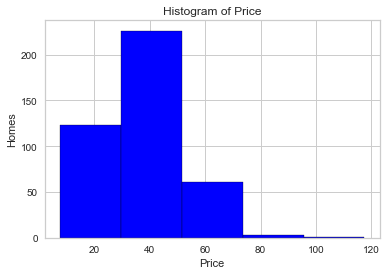

In [18]:
# matplotlib histogram
plt.hist(data['Y house price of unit area'], color = 'blue', edgecolor = 'black',
         bins = int(110/20))

# Add labels
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Homes')

C:\Users\swalker\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


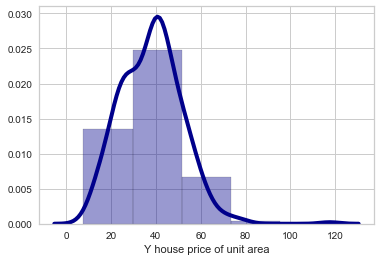

In [22]:
# Density Plot and Histogram of all prices
sns.distplot(data['Y house price of unit area'], hist=True, kde=True, 
             bins=int(110/20), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

# Discover Outliers

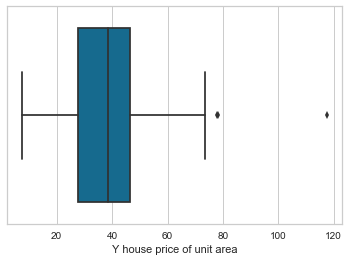

In [9]:
# Discover outliers with box plot. This analyzes uni-variate outlier, i.e. price only, to check outliers. Shows a number of points as outliers.

sns.boxplot(x=data['Y house price of unit area'])

In [10]:
# Use the Z-score function defined in scipy library to detect the outliers. 
# Z-score is finding the distribution of data where mean is 0 and standard deviation is 1, i.e. normal distribution.

z = np.abs(stats.zscore(data))
print(z)

[[1.72787215 0.82368321 1.25562833 ... 1.12542986 0.44876222 0.00590088]
 [1.71950473 0.82368321 0.15708622 ... 0.91244418 0.40113894 0.3105072 ]
 [1.71113731 1.54115111 0.38779067 ... 1.48686011 0.68818339 0.6857819 ]
 ...
 [1.71113731 0.35873395 0.09556786 ... 0.82289338 0.42397202 0.19277396]
 [1.71950473 0.52896662 0.84478419 ... 0.18475479 0.4768143  1.06841493]
 [1.72787215 1.24643452 0.98539758 ... 0.42757905 0.63534112 1.90726426]]


In [11]:
# Define the threshold to identify outliers. In most cases, a threshold of 3 or -3 is used.
# For example, if the Z-score value is greather than 3 or less than -3, that data point will be identified as an outlier.

threshold = 3
print(np.where(z > 3))

(array([  8,   8,  35, 116, 116, 249, 249, 255, 255, 270, 347, 347],
      dtype=int64), array([3, 6, 5, 3, 6, 3, 6, 3, 6, 7, 3, 6], dtype=int64))


In [13]:
# Create a dataframe for the Z-score distribution, to print shape below.

data_1 = pd.read_csv('Real estate valuation data set.csv')

print(data_1)

      No  X1 transaction date  X2 house age  \
0      1             2012.917          32.0   
1      2             2012.917          19.5   
2      3             2013.583          13.3   
3      4             2013.500          13.3   
4      5             2012.833           5.0   
5      6             2012.667           7.1   
6      7             2012.667          34.5   
7      8             2013.417          20.3   
8      9             2013.500          31.7   
9     10             2013.417          17.9   
10    11             2013.083          34.8   
11    12             2013.333           6.3   
12    13             2012.917          13.0   
13    14             2012.667          20.4   
14    15             2013.500          13.2   
15    16             2013.583          35.7   
16    17             2013.250           0.0   
17    18             2012.750          17.7   
18    19             2013.417          16.9   
19    20             2012.667           1.5   
20    21     

In [15]:
data_1 = data[(z < 3).all(axis=1)]

data_1.shape

(407, 8)

In [16]:
# print shape of Z-score distribution (removes outliers and gets the clean data)

data_1 = data[(z < 3).all(axis=1)]

data_1.shape

(407, 8)

# Plot distribution with outliers removed

Text(0,0.5,'Homes')

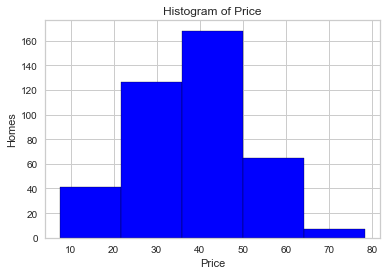

In [17]:
# matplotlib histogram
plt.hist(data_1['Y house price of unit area'], color = 'blue', edgecolor = 'black',
         bins = int(110/20))

# Add labels
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Homes')

In [19]:
data_1.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,207.906634,2013.146211,17.638329,1017.646541,4.149877,24.969113,121.534069,38.094349
std,119.606544,0.281490,11.423157,1134.448058,2.939395,0.012150,0.014223,12.876574
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.495070,7.600000
25%,104.500000,2012.917000,8.900000,289.324800,1.000000,24.963050,121.529810,28.400000
50%,207.000000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538850,38.800000
75%,311.500000,2013.417000,27.800000,1414.837000,6.000000,24.977705,121.543480,46.600000
max,414.000000,2013.583000,43.800000,4605.749000,10.000000,25.001150,121.566270,78.300000


C:\Users\swalker\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


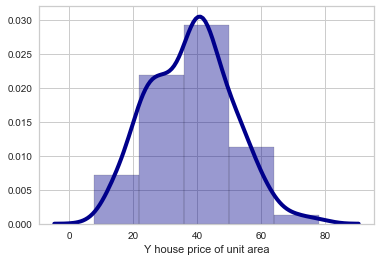

In [21]:
# Density Plot and Histogram of all prices
sns.distplot(data_1['Y house price of unit area'], hist=True, kde=True, 
             bins=int(110/20), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

# Data Discovery

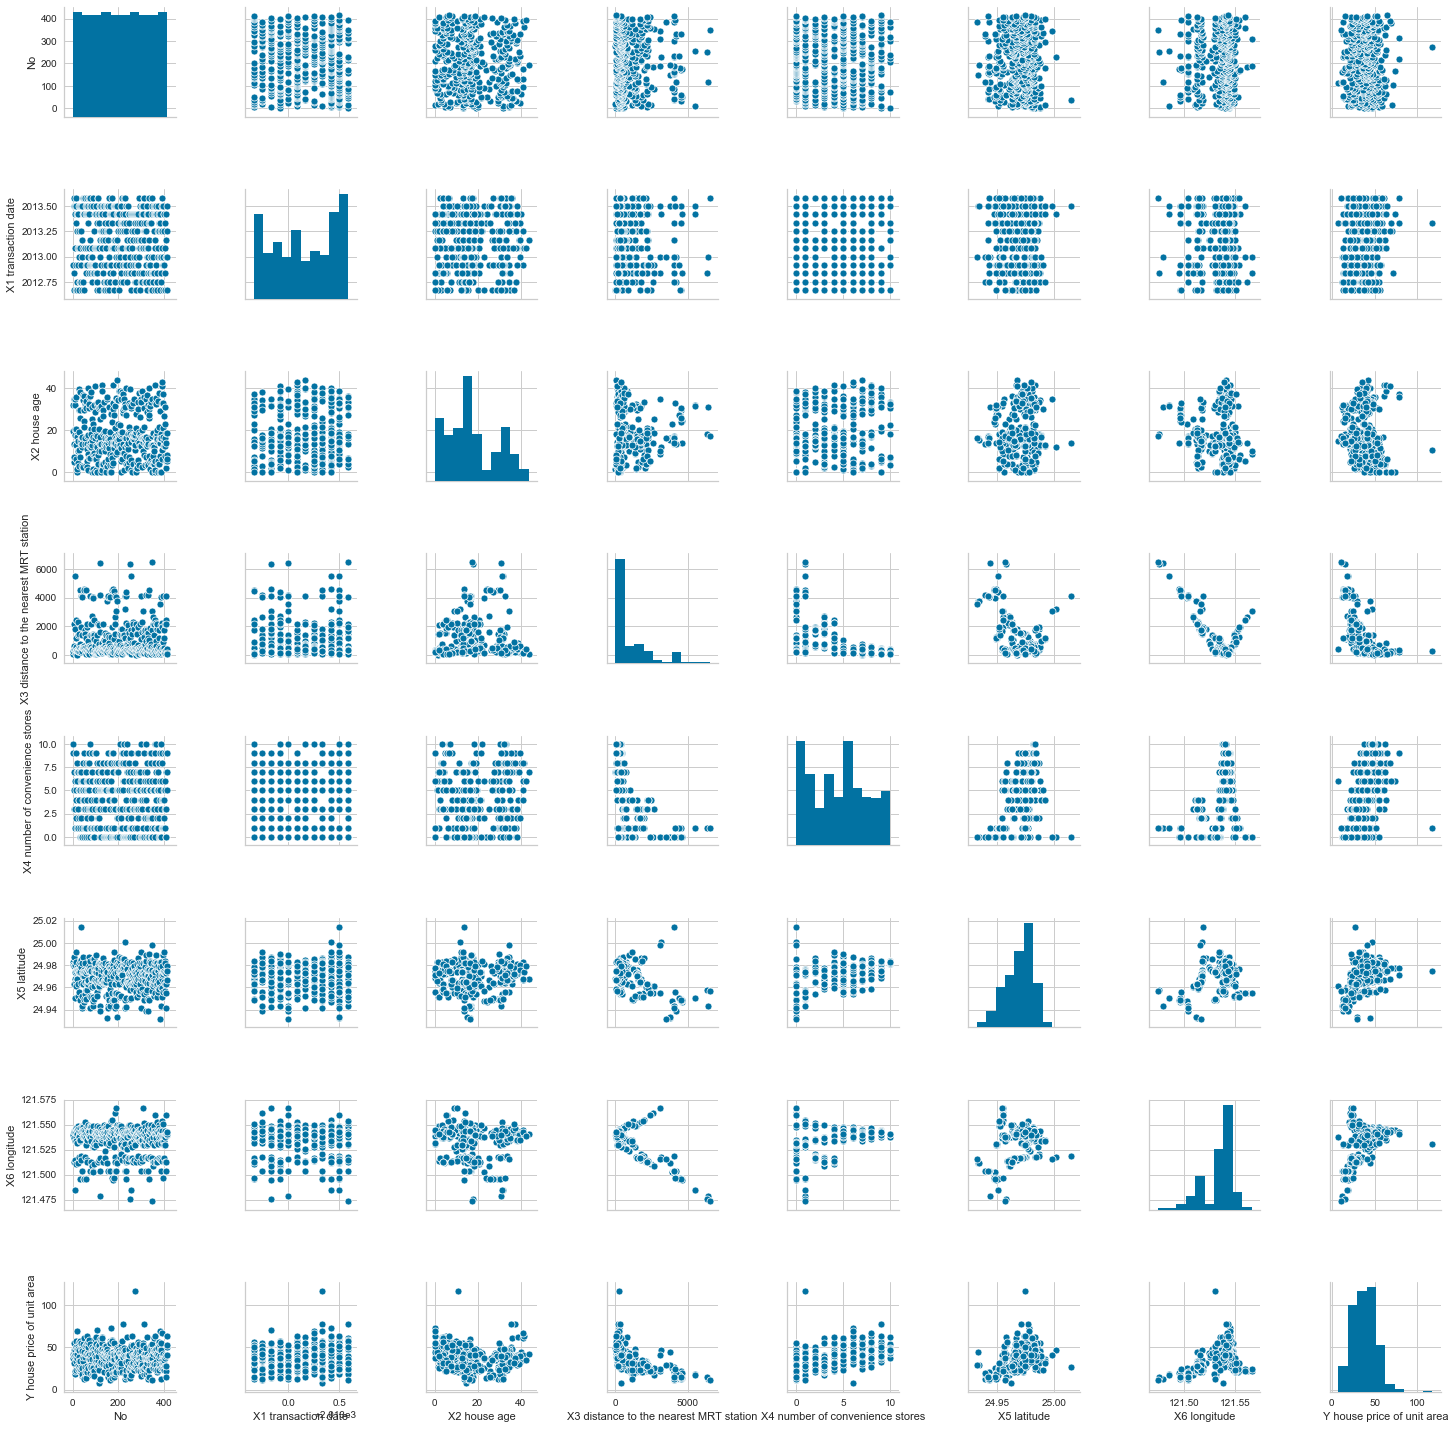

In [6]:
#Get only numerical columns into a DataFrame
numerical_columns = data


#hue_plot = sns.pairplot(numerical_columns, hue = "doors_is")
hue_plot = sns.pairplot(numerical_columns)

Linear
53.505619124508165
0.6810580555095582


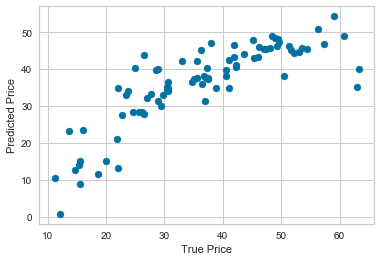

Ridge
54.647179612010866
0.6742533212107116


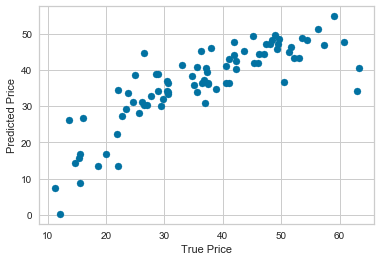

Lasso


C:\Users\swalker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


71.65026638497302
0.5728995261057734


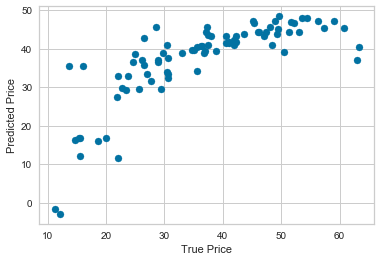

DecisionTree
70.95469879518073
0.5770457388446009


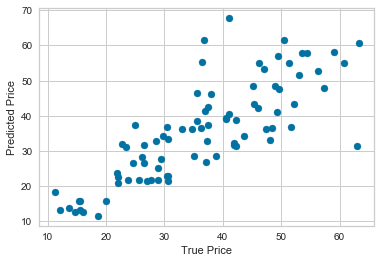

LassoLARS
53.053521515610996
0.6837529666766565


C:\Users\swalker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


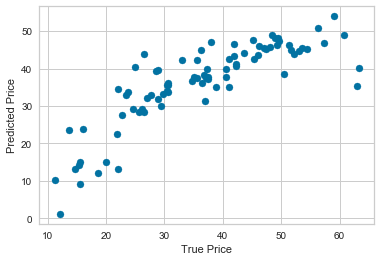

ElasticNet


C:\Users\swalker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


71.87276800635473
0.5715732149456199


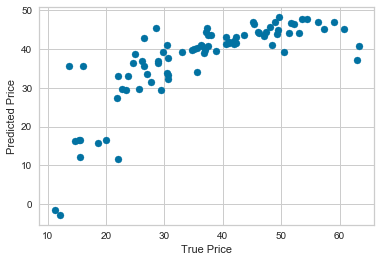

In [10]:
X = data.iloc[:,1:7]
y = data['Y house price of unit area']

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LassoLarsCV
from sklearn.linear_model import ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing.data import QuantileTransformer
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

models = []
models.append(('Linear', LinearRegression()))
models.append(('Ridge', RidgeCV()))
models.append(('Lasso', LassoCV()))
models.append(('DecisionTree', DecisionTreeRegressor()))
models.append(('LassoLARS', LassoLarsCV()))
models.append(('ElasticNet', ElasticNetCV()))

for name, model in models:
    print(name)
    model.fit(X_train, y_train)

#runs model on testing data
    expected = y_test
    predicted = model.predict(X_test)

#prints data and compares predicted price to true price
    print(metrics.mean_squared_error(expected, predicted))
    print(metrics.r2_score(expected, predicted))

    plt.scatter(y_test, model.predict(X_test))
    plt.xlabel('True Price')
    plt.ylabel('Predicted Price')
    plt.show()

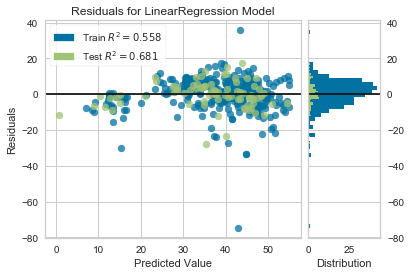

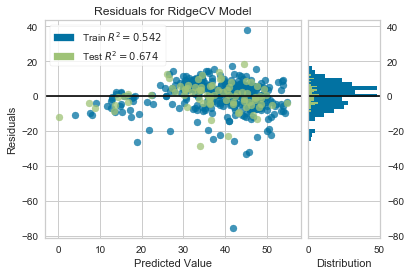

C:\Users\swalker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


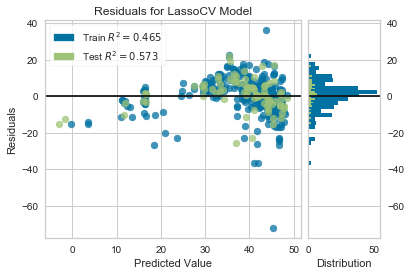

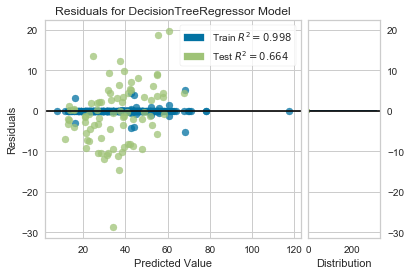

C:\Users\swalker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


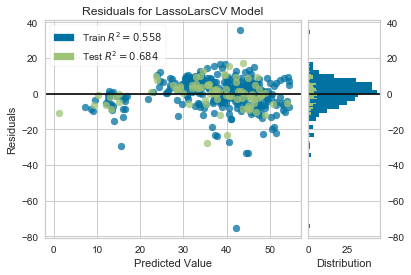

C:\Users\swalker\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


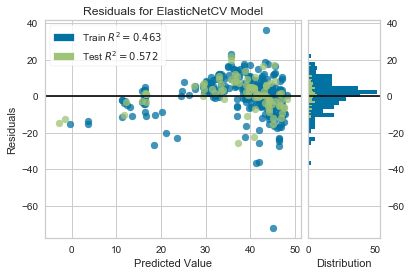

In [12]:
def residuals_plot(model, X, y):
    visualizer = ResidualsPlot(model)

    visualizer.fit(X_train, y_train)  # Fit the training data to the model
    visualizer.score(X_test, y_test)  # Evaluate the model on the test data
    visualizer.poof() 
    
from yellowbrick.regressor import ResidualsPlot

residuals_plot(LinearRegression(), X, y)
residuals_plot(RidgeCV(), X, y)
residuals_plot(LassoCV(), X, y)
residuals_plot(DecisionTreeRegressor(), X, y)
residuals_plot(LassoLarsCV(), X, y)
residuals_plot(ElasticNetCV(), X, y)

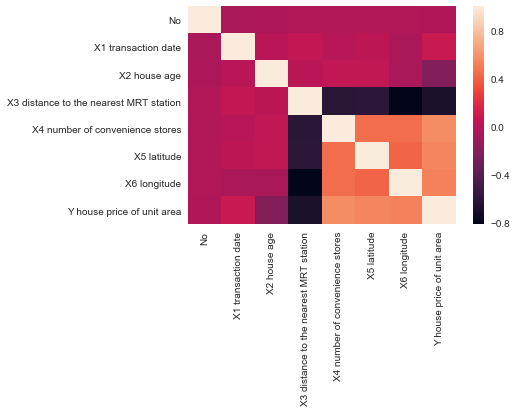

In [13]:
sns.heatmap(data.corr()) 